In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
fifa = pd.read_csv('data.csv')

In [3]:
fifa.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [4]:
fifa.tail()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K
18206,18206,246269,G. Nugent,16,https://cdn.sofifa.org/players/4/19/246269.png,England,https://cdn.sofifa.org/flags/14.png,46,66,Tranmere Rovers,...,43.0,40.0,43.0,50.0,10.0,15.0,9.0,12.0,9.0,€165K


In [5]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null fl

In [6]:
fifa.shape[0]

18207

In [8]:
fifa.Club.nunique()

651

In [10]:
fifa.Nationality.nunique()

164

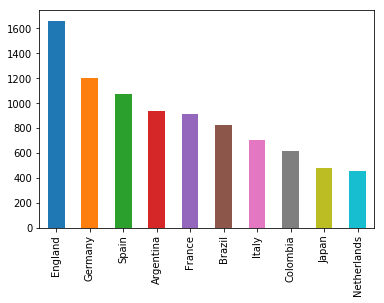

In [33]:
fifa.Nationality.value_counts().head(10).plot.bar()

In [34]:
fifa.Nationality.value_counts().head(10)

England        1662
Germany        1198
Spain          1072
Argentina       937
France          914
Brazil          827
Italy           702
Colombia        618
Japan           478
Netherlands     453
Name: Nationality, dtype: int64

In [35]:
club_overall = {}

In [42]:
for index, data in fifa.iterrows():
    if not data['Club'] in club_overall:
        club_overall[data['Club']] = data.Overall
    else:
        club_overall[data['Club']] += data.Overall
        
club_overall_df = pd.DataFrame(list(club_overall.items()), columns=['Club', 'Overall'])

In [44]:
club_overall_df.head(10)

,Club,Overall
0,FC Barcelona,10300
1,Juventus,8228
2,Paris Saint-Germain,9292
3,Manchester United,10196
4,Manchester City,10128
5,Chelsea,10136
6,Real Madrid,10328
7,Atlético Madrid,9908
8,FC Bayern München,8932
9,Tottenham Hotspur,10124


In [45]:
club_overall_df.tail(10)

,Club,Overall
642,IF Brommapojkarna,6224
643,Crewe Alexandra,6360
644,Yeovil Town,6760
645,Bohemian FC,5500
646,Macclesfield Town,6108
647,Newport County,6108
648,Sligo Rovers,4304
649,Derry City,4016
650,Limerick FC,4144
651,Bray Wanderers,4936


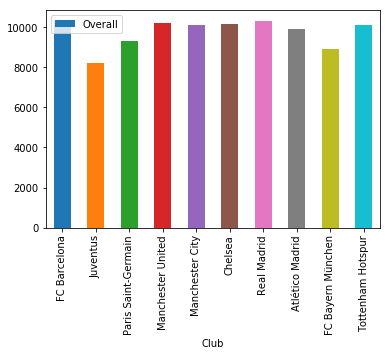

In [53]:
club_overall_df.head(10).plot.bar(x='Club', y='Overall')

In [59]:
club_overall_df = club_overall_df.sort_values(['Overall'], ascending=[0])

In [60]:
club_overall_df.head(10)

,Club,Overall
85,NaN,64804
6,Real Madrid,10328
0,FC Barcelona,10300
3,Manchester United,10196
5,Chelsea,10136
4,Manchester City,10128
9,Tottenham Hotspur,10124
10,Liverpool,10032
16,Borussia Dortmund,9944
12,Arsenal,9924


In [62]:
club_overall_df = club_overall_df.dropna()

In [64]:
club_overall_df.head(10)

,Club,Overall
6,Real Madrid,10328
0,FC Barcelona,10300
3,Manchester United,10196
5,Chelsea,10136
4,Manchester City,10128
9,Tottenham Hotspur,10124
10,Liverpool,10032
16,Borussia Dortmund,9944
12,Arsenal,9924
7,Atlético Madrid,9908


In [65]:
club_overall_df.tail(10)

,Club,Overall
150,Melbourne Victory,5400
639,St. Patrick's Athletic,5316
625,Shamrock Rovers,5288
466,Wellington Phoenix,5224
635,Dalkurd FF,5020
541,Tromsø IL,5016
651,Bray Wanderers,4936
648,Sligo Rovers,4304
650,Limerick FC,4144
649,Derry City,4016
